![image](images/how.png)

#### Aquí encontrarás todo lo que necesitas saber: https://www.kaggle.com/t/997162b5cae941f08ac3d3e6ebab504e

In [26]:
import pandas as pd
import numpy as np
from sklearn import linear_model
# la otra forma, pero con mismo resultado: from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [4]:
### para que funcione necesitas bajarte los archivos de datos de Kaggle :) 
df = pd.read_csv("data/train_set.csv")

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 18 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   0       100000 non-null  int64  
 1   1       100000 non-null  int64  
 2   2       100000 non-null  object 
 3   3       100000 non-null  int64  
 4   4       100000 non-null  object 
 5   5       100000 non-null  int64  
 6   6       100000 non-null  object 
 7   7       100000 non-null  object 
 8   8       100000 non-null  object 
 9   9       99967 non-null   float64
 10  10      100000 non-null  int64  
 11  11      98517 non-null   float64
 12  12      100000 non-null  object 
 13  13      100000 non-null  object 
 14  14      100000 non-null  int64  
 15  15      100000 non-null  object 
 16  16      100000 non-null  float64
 17  17      100000 non-null  object 
dtypes: float64(3), int64(6), object(9)
memory usage: 13.7+ MB


In [6]:
df["4"].value_counts()

X    41936
Y    38430
Z    19634
Name: 4, dtype: int64

In [24]:
df["7"].value_counts()

R    40300
Q    33325
S    24351
P     1565
T      456
U        3
Name: 7, dtype: int64

In [7]:
df["9"].value_counts()

2.0    38932
3.0    34548
4.0    18096
1.0     8391
Name: 9, dtype: int64

In [8]:
df["11"].value_counts()

8.0     38855
2.0     12212
1.0      8337
7.0      7416
5.0      6355
4.0      4861
9.0      3740
15.0     2828
10.0     2566
6.0      1889
12.0     1751
3.0      1216
23.0     1114
14.0      922
16.0      684
13.0      504
21.0      481
20.0      452
18.0      444
19.0      335
26.0      296
25.0      241
27.0      237
11.0      209
28.0      159
24.0      124
22.0      118
30.0       36
29.0       27
31.0       25
33.0       24
32.0       17
34.0       14
37.0       14
35.0        7
36.0        6
38.0        1
Name: 11, dtype: int64

In [18]:
df["13"].value_counts()

Moderate    55260
Minor       26999
Extreme     17741
Name: 13, dtype: int64

In [19]:
df["12"].value_counts()

Trauma       47537
Emergency    37287
Urgent       15176
Name: 12, dtype: int64

In [21]:
df["14"].value_counts()

2     43438
4     24760
3     18568
6      5950
5      2880
8      1661
7       752
9       421
10      412
1       363
12      313
11      112
16       89
14       68
15       61
13       40
24       27
20       26
18       20
0         9
22        6
17        5
25        5
21        4
19        3
23        3
30        2
32        2
Name: 14, dtype: int64

In [22]:
df["17"].value_counts()

21-30                 27452
11-20                 24476
31-40                 17311
51-60                 10984
0-10                   7427
41-50                  3668
71-80                  3297
More than 100 Days     2150
81-90                  1470
91-100                  908
61-70                   857
Name: 17, dtype: int64

In [25]:
df["15"].value_counts()

41-50     20115
31-40     20017
51-60     15194
21-30     12683
71-80     11272
61-70     10617
11-20      5327
81-90      2419
0-10       1926
91-100      430
Name: 15, dtype: int64

In [23]:
df["6"].value_counts()

gynecology            78333
anesthesia             9262
radiotherapy           8909
TB & Chest disease     3105
surgery                 391
Name: 6, dtype: int64

In [35]:
le = LabelEncoder()
df["encode_4"] = le.fit_transform(df["4"])
df["encode_6"] = le.fit_transform(df["6"])
df["encode_7"] = le.fit_transform(df["7"])
df["encode_8"] = le.fit_transform(df["8"])
df["encode_12"] = le.fit_transform(df["12"])
df["encode_13"] = le.fit_transform(df["13"])
df["encode_15"] = le.fit_transform(df["15"])
df

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,encode_4,encode_6,encode_12,encode_13,encode_15,encode_7,encode_8
0,161528,6,a,6,X,2,gynecology,R,F,4.0,...,21-30,2817.0,0-10,0,2,2,2,2,2,5
1,159472,23,a,6,X,4,gynecology,Q,F,2.0,...,51-60,4498.0,21-30,0,2,1,2,5,1,5
2,309765,2,c,5,Z,2,anesthesia,S,F,3.0,...,71-80,4573.0,11-20,2,1,2,2,7,3,5
3,279614,32,f,9,Y,3,gynecology,S,B,4.0,...,11-20,7202.0,51-60,1,2,0,2,1,3,1
4,147791,14,a,1,X,3,gynecology,S,E,2.0,...,51-60,3398.0,51-60,0,2,2,2,5,3,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,237869,12,a,9,Y,3,gynecology,R,B,3.0,...,51-60,3966.0,More than 100 Days,1,2,0,2,5,2,1
99996,254763,28,b,11,X,2,gynecology,R,F,2.0,...,21-30,4005.0,51-60,0,2,2,2,2,2,5
99997,69788,6,a,6,X,3,gynecology,Q,F,3.0,...,31-40,5215.0,31-40,0,2,1,1,3,1,5
99998,204442,32,f,9,Y,2,gynecology,S,B,4.0,...,41-50,5092.0,11-20,1,2,1,2,4,3,1


In [29]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,encode_4,encode_6,encode_12,encode_13,encode_15
0,161528,6,a,6,X,2,gynecology,R,F,4.0,...,Moderate,2,21-30,2817.0,0-10,0,2,2,2,2
1,159472,23,a,6,X,4,gynecology,Q,F,2.0,...,Moderate,4,51-60,4498.0,21-30,0,2,1,2,5
2,309765,2,c,5,Z,2,anesthesia,S,F,3.0,...,Moderate,2,71-80,4573.0,11-20,2,1,2,2,7
3,279614,32,f,9,Y,3,gynecology,S,B,4.0,...,Moderate,4,11-20,7202.0,51-60,1,2,0,2,1
4,147791,14,a,1,X,3,gynecology,S,E,2.0,...,Moderate,2,51-60,3398.0,51-60,0,2,2,2,5


In [36]:
df.columns

Index(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',
       '13', '14', '15', '16', '17', 'encode_4', 'encode_6', 'encode_12',
       'encode_13', 'encode_15', 'encode_7', 'encode_8'],
      dtype='object')

<AxesSubplot:>

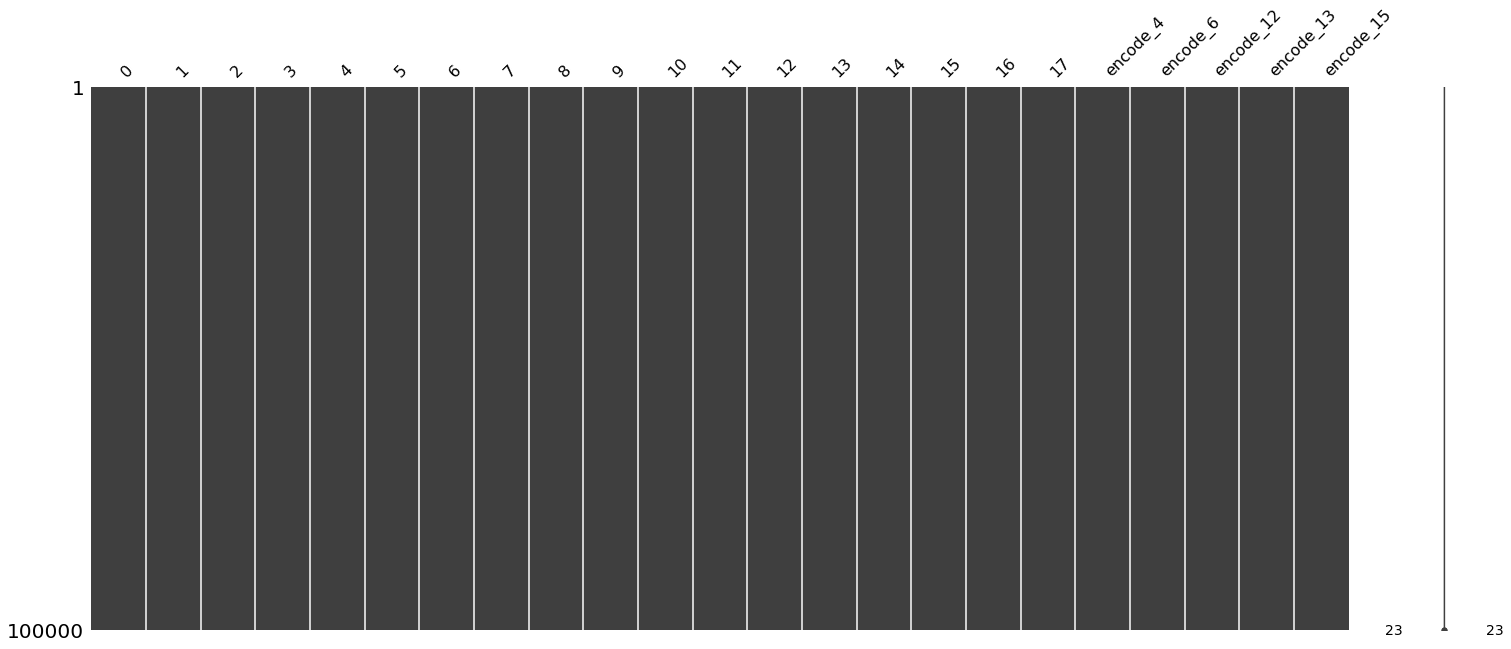

In [31]:
import missingno as msno

msno.matrix(df)

In [33]:
df.isnull().sum()

0            0
1            0
2            0
3            0
4            0
5            0
6            0
7            0
8            0
9            0
10           0
11           0
12           0
13           0
14           0
15           0
16           0
17           0
encode_4     0
encode_6     0
encode_12    0
encode_13    0
encode_15    0
dtype: int64

In [34]:
df

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,encode_4,encode_6,encode_12,encode_13,encode_15
0,161528,6,a,6,X,2,gynecology,R,F,4.0,...,Moderate,2,21-30,2817.0,0-10,0,2,2,2,2
1,159472,23,a,6,X,4,gynecology,Q,F,2.0,...,Moderate,4,51-60,4498.0,21-30,0,2,1,2,5
2,309765,2,c,5,Z,2,anesthesia,S,F,3.0,...,Moderate,2,71-80,4573.0,11-20,2,1,2,2,7
3,279614,32,f,9,Y,3,gynecology,S,B,4.0,...,Moderate,4,11-20,7202.0,51-60,1,2,0,2,1
4,147791,14,a,1,X,3,gynecology,S,E,2.0,...,Moderate,2,51-60,3398.0,51-60,0,2,2,2,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,237869,12,a,9,Y,3,gynecology,R,B,3.0,...,Moderate,6,51-60,3966.0,More than 100 Days,1,2,0,2,5
99996,254763,28,b,11,X,2,gynecology,R,F,2.0,...,Moderate,3,21-30,4005.0,51-60,0,2,2,2,2
99997,69788,6,a,6,X,3,gynecology,Q,F,3.0,...,Minor,2,31-40,5215.0,31-40,0,2,1,1,3
99998,204442,32,f,9,Y,2,gynecology,S,B,4.0,...,Moderate,3,41-50,5092.0,11-20,1,2,1,2,4


In [32]:
df[df["11"].isnull()]

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
22,115968,23,a,6,X,3,gynecology,R,F,3.0,31502,NaN,Emergency,Minor,3,31-40,3303.0,21-30
32,237953,28,b,11,X,3,anesthesia,R,F,4.0,46206,NaN,Trauma,Moderate,8,51-60,3701.0,71-80
62,316165,23,a,6,X,7,gynecology,Q,F,2.0,71808,NaN,Trauma,Extreme,4,71-80,4917.0,21-30
80,149141,9,d,5,Z,5,gynecology,Q,F,4.0,100594,NaN,Trauma,Minor,4,71-80,5057.0,21-30
105,242959,14,a,1,X,4,gynecology,Q,E,4.0,32377,NaN,Emergency,Minor,4,21-30,4927.0,31-40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99826,30816,15,c,5,Z,2,gynecology,R,F,3.0,118693,NaN,Urgent,Extreme,4,41-50,5104.0,71-80
99888,171194,28,b,11,X,4,gynecology,R,F,1.0,27835,NaN,Trauma,Extreme,2,31-40,4617.0,21-30
99892,276580,10,e,1,X,5,gynecology,Q,E,2.0,101453,NaN,Emergency,Moderate,2,41-50,4514.0,21-30
99945,185416,23,a,6,X,4,anesthesia,Q,F,4.0,54725,NaN,Trauma,Moderate,3,71-80,5768.0,21-30


In [13]:
import numpy as np 

df = df.fillna(0)
print(df)
df.isnull().sum()

            0   1  2   3  4  5           6  7  8    9      10    11  \
0      161528   6  a   6  X  2  gynecology  R  F  4.0   45810   2.0   
1      159472  23  a   6  X  4  gynecology  Q  F  2.0  128565  15.0   
2      309765   2  c   5  Z  2  anesthesia  S  F  3.0   46565   5.0   
3      279614  32  f   9  Y  3  gynecology  S  B  4.0  124546   6.0   
4      147791  14  a   1  X  3  gynecology  S  E  2.0   22729   8.0   
...       ...  .. ..  .. .. ..         ... .. ..  ...     ...   ...   
99995  237869  12  a   9  Y  3  gynecology  R  B  3.0   82914   3.0   
99996  254763  28  b  11  X  2  gynecology  R  F  2.0   40026   5.0   
99997   69788   6  a   6  X  3  gynecology  Q  F  3.0   92346   2.0   
99998  204442  32  f   9  Y  2  gynecology  S  B  4.0  113798  15.0   
99999   69647  25  e   1  X  3  gynecology  Q  E  2.0  109237   8.0   

              12        13  14     15      16                  17  
0         Urgent  Moderate   2  21-30  2817.0                0-10  
1         T

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
dtype: int64

In [15]:
df.corr()

,0,1,3,5,9,10,11,14,16
0,1.000000,-0.044017,-0.012569,0.044390,0.012226,-0.005268,0.058101,-0.000304,-0.043202
1,-0.044017,1.000000,0.128066,-0.060985,-0.009466,0.002042,-0.017554,-0.028417,0.049095
3,-0.012569,0.128066,1.000000,-0.043746,-0.048851,-0.004483,-0.022933,0.021327,-0.033820
5,0.044390,-0.060985,-0.043746,1.000000,-0.118681,0.005043,-0.011819,0.091744,-0.141999
9,0.012226,-0.009466,-0.048851,-0.118681,1.000000,0.005968,-0.015789,0.093004,0.071154
10,-0.005268,0.002042,-0.004483,0.005043,0.005968,1.000000,0.006579,0.007707,-0.001891
11,0.058101,-0.017554,-0.022933,-0.011819,-0.015789,0.006579,1.000000,-0.011013,0.026066
14,-0.000304,-0.028417,0.021327,0.091744,0.093004,0.007707,-0.011013,1.000000,-0.152946
16,-0.043202,0.049095,-0.033820,-0.141999,0.071154,-0.001891,0.026066,-0.152946,1.000000


<AxesSubplot:>

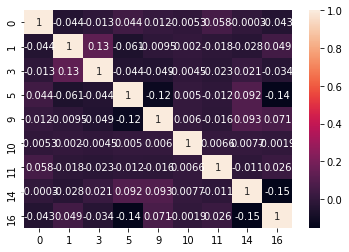

In [17]:
sns.heatmap(df.corr(), annot = True)

#### 1. Definir X e y

In [38]:
# coger las columnas 1, 3, 5, 9 tiene solo valor ilustrativo, NO LO COPIÉIS
X = np.array(df[['0', '1', '3', 'encode_4', '5', 'encode_6', 'encode_7', 'encode_8', '9', '10', '11', 'encode_12', 'encode_13', '14', 'encode_15', '16']])
y = np.array(df['17'])
X.shape

(100000, 16)

In [39]:
y.shape

(100000,)

#### 2. Dividir X_train, X_test, y_train, y_test

In [142]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=12)

In [143]:
X_train

array([[1.33108e+05, 6.00000e+00, 6.00000e+00, ..., 3.00000e+00,
        5.00000e+00, 4.60200e+03],
       [1.08090e+04, 3.00000e+00, 3.00000e+00, ..., 6.00000e+00,
        7.00000e+00, 3.36200e+03],
       [2.84107e+05, 6.00000e+00, 6.00000e+00, ..., 4.00000e+00,
        5.00000e+00, 3.93100e+03],
       ...,
       [1.20474e+05, 2.90000e+01, 4.00000e+00, ..., 2.00000e+00,
        5.00000e+00, 5.75200e+03],
       [2.94836e+05, 3.00000e+00, 3.00000e+00, ..., 2.00000e+00,
        3.00000e+00, 4.59300e+03],
       [1.51131e+05, 9.00000e+00, 5.00000e+00, ..., 4.00000e+00,
        8.00000e+00, 5.11300e+03]])

#### 3. Asignar el modelo (vacío) a una variable
Aquí meteríais los parámetros

In [144]:
model = linear_model.LogisticRegression()
# la otra forma, pero lo mismo: model = LogisticRegression()

#### 4. Entrenar el modelo con X_train, y_train

In [145]:
model.fit(X_train, y_train)

LogisticRegression()

#### 5. Predecir con el modelo ya entrenado con X_test

In [146]:
predictions = model.predict(X_test)
print(predictions)

['21-30' '21-30' '11-20' ... '21-30' '11-20' '11-20']


#### 6. Sacar métricas, valorar el modelo 

In [147]:
model.score(X_test,y_test)

0.2797222222222222

## Una vez listo el modelo, toca predecir con el dataset de predicción 

In [148]:
to_pred = pd.read_csv("data/test_set.csv")

In [149]:
# la primera columna es id_case, deberéis quitarla para hacer la predicción si la habéis quitado para entrenar
# pero guardarla para incluirla en la submission

# IMPORTANTE: APLICAR LO MISMO A ESTOS DATOS QUE HAYÁIS APLICADO A LOS DATOS DE ENTRENAMIENTO
# SI EL ARRAY CON EL QUE HICISTEIS .fit() ERA DE 4 COLUMNAS, PARA .predict() DEBEN SER LAS MISMAS
# SI AL ARRAY CON EL QUE HICISTEIS .fit() LO NORMALIZASTEIS, PARA .predict() DEBÉIS NORMALIZARLO
# TODO IGUAL SALVO BORRAR FILAS, EL NÚMERO DE ROWS SE DEBE MANTENER EN ESTE SET, PUES LA PREDICCIÓN DEBE TENER 133744 FILAS
# SI O SI

to_pred

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,314114,19,a,7,Y,4,gynecology,S,C,2.0,59278,8.0,Emergency,Minor,2,41-50,4778.0
1,208989,15,c,5,Z,3,gynecology,S,F,2.0,102253,15.0,Trauma,Moderate,3,31-40,5734.0
2,305872,17,e,1,X,4,gynecology,R,E,4.0,5828,4.0,Emergency,Minor,3,71-80,5064.0
3,266099,3,c,3,Z,4,TB & Chest disease,R,A,2.0,56642,9.0,Urgent,Extreme,4,31-40,3254.0
4,13228,6,a,6,X,4,gynecology,R,F,1.0,116266,8.0,Emergency,Minor,3,21-30,4639.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133739,318155,18,d,13,Y,6,anesthesia,Q,B,3.0,123269,25.0,Urgent,Minor,4,51-60,5089.0
133740,144850,27,a,7,Y,2,gynecology,S,C,2.0,1293,8.0,Emergency,Moderate,3,61-70,6713.0
133741,180676,16,c,3,Z,3,gynecology,R,A,3.0,112921,5.0,Trauma,Minor,3,31-40,5326.0
133742,39933,28,b,11,X,4,gynecology,R,F,2.0,585,2.0,Trauma,Extreme,2,31-40,7072.0


In [150]:
to_pred.isnull().sum()

0        0
1        0
2        0
3        0
4        0
5        0
6        0
7        0
8        0
9       40
10       0
11    1817
12       0
13       0
14       0
15       0
16       0
dtype: int64

In [151]:
#He rellenado los NaN's con 0 como he hecho en el dataset de train

to_pred = to_pred.fillna(0)
print(to_pred)
to_pred.isnull().sum()

             0   1  2   3  4  5                   6  7  8    9      10    11  \
0       314114  19  a   7  Y  4          gynecology  S  C  2.0   59278   8.0   
1       208989  15  c   5  Z  3          gynecology  S  F  2.0  102253  15.0   
2       305872  17  e   1  X  4          gynecology  R  E  4.0    5828   4.0   
3       266099   3  c   3  Z  4  TB & Chest disease  R  A  2.0   56642   9.0   
4        13228   6  a   6  X  4          gynecology  R  F  1.0  116266   8.0   
...        ...  .. ..  .. .. ..                 ... .. ..  ...     ...   ...   
133739  318155  18  d  13  Y  6          anesthesia  Q  B  3.0  123269  25.0   
133740  144850  27  a   7  Y  2          gynecology  S  C  2.0    1293   8.0   
133741  180676  16  c   3  Z  3          gynecology  R  A  3.0  112921   5.0   
133742   39933  28  b  11  X  4          gynecology  R  F  2.0     585   2.0   
133743  116673   6  a   6  X  4  TB & Chest disease  Q  F  2.0  119482  12.0   

               12        13  14     15 

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
dtype: int64

In [152]:
le = LabelEncoder()
to_pred["encode_4"] = le.fit_transform(to_pred["4"])
to_pred["encode_6"] = le.fit_transform(to_pred["6"])
to_pred["encode_7"] = le.fit_transform(to_pred["7"])
to_pred["encode_8"] = le.fit_transform(to_pred["8"])
to_pred["encode_12"] = le.fit_transform(to_pred["12"])
to_pred["encode_13"] = le.fit_transform(to_pred["13"])
to_pred["encode_15"] = le.fit_transform(to_pred["15"])
to_pred

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,encode_4,encode_6,encode_7,encode_8,encode_12,encode_13,encode_15
0,314114,19,a,7,Y,4,gynecology,S,C,2.0,...,2,41-50,4778.0,1,2,3,2,0,1,4
1,208989,15,c,5,Z,3,gynecology,S,F,2.0,...,3,31-40,5734.0,2,2,3,5,1,2,3
2,305872,17,e,1,X,4,gynecology,R,E,4.0,...,3,71-80,5064.0,0,2,2,4,0,1,7
3,266099,3,c,3,Z,4,TB & Chest disease,R,A,2.0,...,4,31-40,3254.0,2,0,2,0,2,0,3
4,13228,6,a,6,X,4,gynecology,R,F,1.0,...,3,21-30,4639.0,0,2,2,5,0,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133739,318155,18,d,13,Y,6,anesthesia,Q,B,3.0,...,4,51-60,5089.0,1,1,1,1,2,1,5
133740,144850,27,a,7,Y,2,gynecology,S,C,2.0,...,3,61-70,6713.0,1,2,3,2,0,2,6
133741,180676,16,c,3,Z,3,gynecology,R,A,3.0,...,3,31-40,5326.0,2,2,2,0,1,1,3
133742,39933,28,b,11,X,4,gynecology,R,F,2.0,...,2,31-40,7072.0,0,2,2,5,1,0,3


In [153]:
predictions_submit = model.predict(to_pred[['0', '1', '3', 'encode_4', '5', 'encode_6', 'encode_7', 'encode_8', '9', '10', '11', 'encode_12', 'encode_13', '14', 'encode_15', '16']])
predictions_submit

array(['11-20', '21-30', '11-20', ..., '21-30', '21-30', '21-30'],
      dtype=object)

In [154]:
submission = pd.DataFrame({"id": to_pred["0"], "days": predictions_submit})
submission

,id,days
0,314114,11-20
1,208989,21-30
2,305872,11-20
3,266099,11-20
4,13228,21-30
...,...,...
133739,318155,11-20
133740,144850,21-30
133741,180676,21-30
133742,39933,21-30


In [155]:
model.score

<bound method ClassifierMixin.score of LogisticRegression()>

In [156]:
sample = pd.read_csv("data/sample_submission.csv")

In [157]:
sample.shape

(133744, 2)

In [158]:
if submission.shape == sample.shape:
    if submission.columns.all() == sample.columns.all():
        if submission.id.all() == sample.id.all():
            print("you're ready to submit!")
            submission.to_csv("output/to_submit_8.csv", index = False)
            # ¡¡¡¡¡¡¡ADD INDEX = FALSE!!!!!!!!!

you're ready to submit!
